<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Algorithmic Trading

**Chapter 04 &mdash; Vectorized Backtesting**

## Strategies based on Simple Moving Averages

### Getting into the Basics 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# data from http://hilpisch.com/pyalgo_eikon_eod_data.csv
raw = pd.read_csv('../input/pyalgo_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [4]:
data = pd.DataFrame(raw['EUR='])

In [5]:
data.rename(columns={'EUR=': 'price'}, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [7]:
data['SMA1'] = data['price'].rolling(42).mean()

In [8]:
data['SMA2'] = data['price'].rolling(252).mean()

In [9]:
data.tail()

,price,SMA1,SMA2
Date,,,
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333
2019-12-31,1.1210,1.108279,1.119231


In [10]:
# sets up the matplotlib to work interactively
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

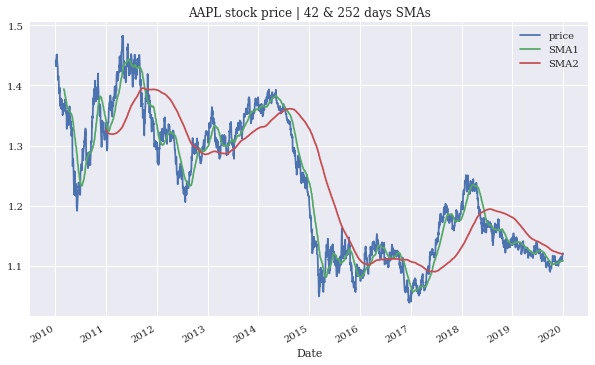

In [11]:
data.plot(title='AAPL stock price | 42 & 252 days SMAs', figsize=(10, 6));
# plt.savefig('../../images/ch04/sma_plot_1.png')

In [12]:
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

In [13]:
data

,price,SMA1,SMA2,position
Date,,,,
2010-01-04,1.4411,NaN,NaN,-1
2010-01-05,1.4368,NaN,NaN,-1
2010-01-06,1.4412,NaN,NaN,-1
2010-01-07,1.4318,NaN,NaN,-1
2010-01-08,1.4412,NaN,NaN,-1
...,...,...,...,...
2019-12-24,1.1087,1.107698,1.119630,-1
2019-12-26,1.1096,1.107740,1.119529,-1
2019-12-27,1.1175,1.107924,1.119428,-1


In [14]:
data.dropna(inplace=True)

In [15]:
data

,price,SMA1,SMA2,position
Date,,,,
2010-12-31,1.3377,1.342579,1.326218,1
2011-01-03,1.3351,1.340945,1.325798,1
2011-01-04,1.3301,1.338940,1.325374,1
2011-01-05,1.3151,1.336448,1.324874,1
2011-01-06,1.3001,1.333995,1.324351,1
...,...,...,...,...
2019-12-24,1.1087,1.107698,1.119630,-1
2019-12-26,1.1096,1.107740,1.119529,-1
2019-12-27,1.1175,1.107924,1.119428,-1


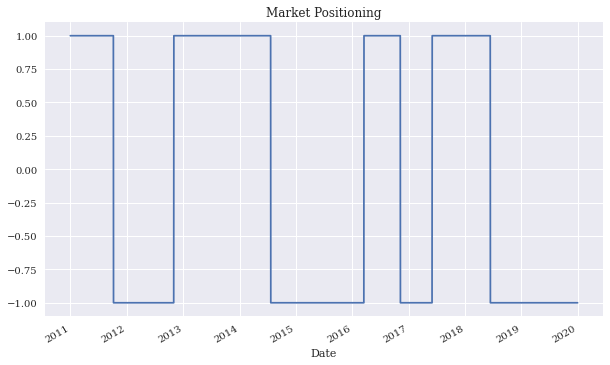

In [16]:
data['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning', figsize=(10, 6));
# plt.savefig('../../images/ch04/sma_plot_2.png')

In [17]:
# get "Log returns". 
# calculation that assumes a continuously compounding rate of return.
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [18]:
data

,price,SMA1,SMA2,position,returns
Date,,,,,
2010-12-31,1.3377,1.342579,1.326218,1,NaN
2011-01-03,1.3351,1.340945,1.325798,1,-0.001946
2011-01-04,1.3301,1.338940,1.325374,1,-0.003752
2011-01-05,1.3151,1.336448,1.324874,1,-0.011341
2011-01-06,1.3001,1.333995,1.324351,1,-0.011472
...,...,...,...,...,...
2019-12-24,1.1087,1.107698,1.119630,-1,0.000090
2019-12-26,1.1096,1.107740,1.119529,-1,0.000811
2019-12-27,1.1175,1.107924,1.119428,-1,0.007094


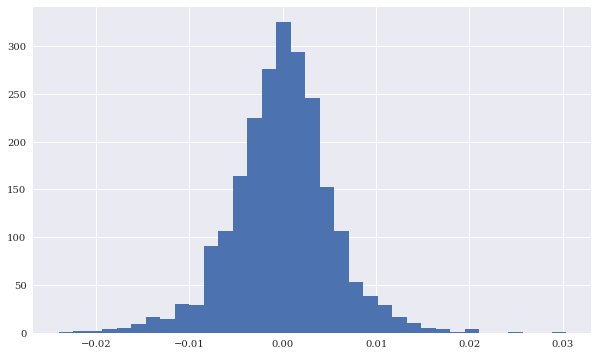

In [19]:
data['returns'].hist(bins=35, figsize=(10, 6));
# plt.savefig('../../images/ch04/sma_plot_3.png')

In [20]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [21]:
data[['returns', 'strategy']].sum()

returns    -0.176731
strategy    0.253121
dtype: float64

In [22]:
data[['returns', 'strategy']].sum().apply(np.exp)

returns     0.838006
strategy    1.288039
dtype: float64

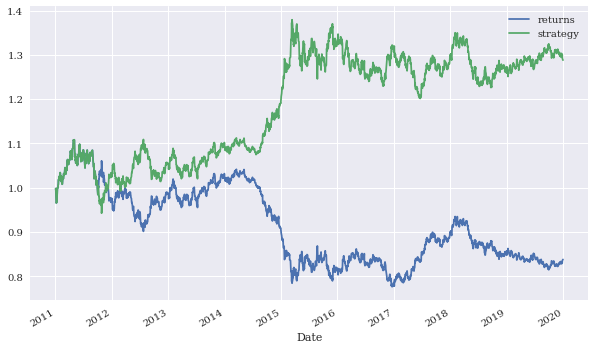

In [23]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch04/sma_plot_4.png')

#### Calc the annualized mean return

In [24]:
data[['returns', 'strategy']].mean() * 252

returns    -0.019671
strategy    0.028174
dtype: float64

In [25]:
np.exp(data[['returns', 'strategy']].mean() * 252) - 1

returns    -0.019479
strategy    0.028575
dtype: float64

### Calc the annualized standard deviation

In [26]:
data[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.085414
strategy    0.085405
dtype: float64

In [27]:
np.exp(data[['returns', 'strategy']].std() * 252 ** 0.5) - 1

returns     0.089168
strategy    0.089158
dtype: float64

### Calc the max and the longest drawdown

1. calc the cumret and cummax (then plot)
2. the max drawdown is the greatest diff between the two
3. calc the longest drawdown

In [28]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)

In [29]:
data['cummax'] = data['cumret'].cummax()

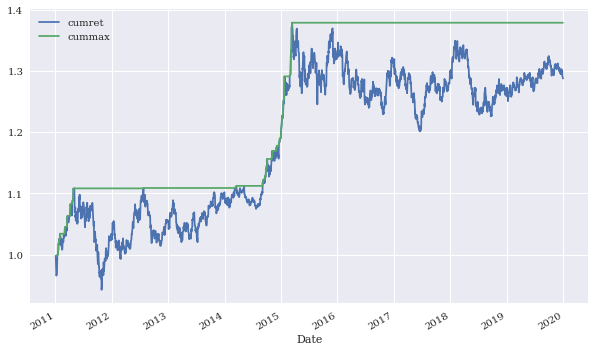

In [30]:
data[['cumret', 'cummax']].dropna().plot(figsize=(10, 6));
# plt.savefig('../../images/ch04/sma_plot_5.png')

In [31]:
drawdown = data['cummax'] - data['cumret']

In [32]:
drawdown

Date
2010-12-31         NaN
2011-01-03    0.000000
2011-01-04    0.003738
2011-01-05    0.014951
2011-01-06    0.026164
                ...   
2019-12-24    0.077022
2019-12-26    0.078078
2019-12-27    0.087278
2019-12-30    0.089816
2019-12-31    0.091312
Length: 2265, dtype: float64

In [33]:
data

,price,SMA1,SMA2,position,returns,strategy,cumret,cummax
Date,,,,,,,,
2010-12-31,1.3377,1.342579,1.326218,1,NaN,NaN,NaN,NaN
2011-01-03,1.3351,1.340945,1.325798,1,-0.001946,-0.001946,0.998056,0.998056
2011-01-04,1.3301,1.338940,1.325374,1,-0.003752,-0.003752,0.994319,0.998056
2011-01-05,1.3151,1.336448,1.324874,1,-0.011341,-0.011341,0.983105,0.998056
2011-01-06,1.3001,1.333995,1.324351,1,-0.011472,-0.011472,0.971892,0.998056
...,...,...,...,...,...,...,...,...
2019-12-24,1.1087,1.107698,1.119630,-1,0.000090,-0.000090,1.302328,1.379350
2019-12-26,1.1096,1.107740,1.119529,-1,0.000811,-0.000811,1.301272,1.379350
2019-12-27,1.1175,1.107924,1.119428,-1,0.007094,-0.007094,1.292073,1.379350


In [34]:
drawdown.max()

0.17779367070195895

In [35]:
temp = drawdown[drawdown == 0]

In [36]:
periods = (temp.index[1:].to_pydatetime() -
           temp.index[:-1].to_pydatetime())

In [37]:
periods[12:15]

array([datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=10)], dtype=object)

In [38]:
periods.max()

datetime.timedelta(days=596)

### Generalizing the Approach

In [39]:
# Add "utils/" to the path to import some helper functions
import sys
sys.path.append('../utils')

In [40]:
import SMAVectorBackTester as SMA

In [41]:
smabt = SMA.SMAVectorBackTester('EUR=', 42, 252, '2010-1-1', '2019-12-31') 

In [42]:
smabt.run_strategy()

(1.29, 0.45)

In [43]:
smabt.optimize_parameters((30, 50, 2),  (200, 300, 2))

(array([ 48., 238.]), 1.5)

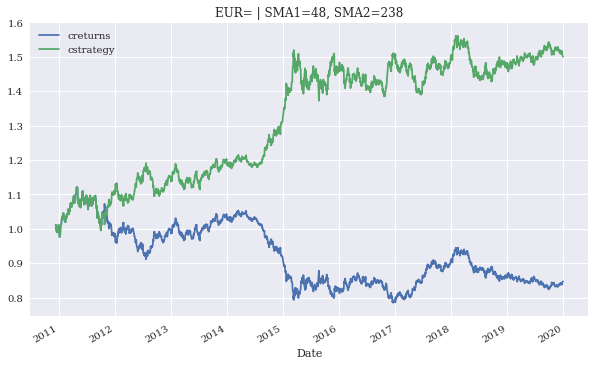

In [44]:
smabt.plot_results()
# plt.savefig('../../images/ch04/sma_plot_6.png')

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>